In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#구글 드라이브 마운트하기
from google.colab import drive 
drive.mount('/content/drive')

#데이터 불러오기
#드라이브에 올려준 csv 데이터 파일 불러오기(구글 드라이브의 내 드라이브에 hotel_bookings.csv 파일이 업로드 되어 있어야 함.)
hotel = pd.read_csv('/content/drive/MyDrive/hotel_bookings.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# 데이터의 각 열에 대한 설명

# hotel
# 호텔(H1 = 리조트 호텔 또는 H2 = 시티 호텔)

# is_canceled
# 예약 취소 여부(yes: 1, no: 0) 여부를 나타내는 값

# lead_time
# PMS(Property management system. 자산 관리 시스템)에 예약을 입력한 날짜와 도착 날짜 사이에 경과된 일 수

# arrival_date_year
# 도착 연도

# arrival_date_month
# 도착한 달

# arrival_date_week_number
# 도착한 주의 번호(당해 해의 몇번째 주에 도착했는지를 나타냄.)

# arrival_date_day_of_month
# 도착일

# stays_in_weekend_nights
# 주말 숙박(토요일 또는 일요일) 투숙객이 호텔에 숙박했거나 숙박을 예약한 일수

# stays_in_week_nights
# 손님이 호텔에 숙박했거나 예약한 주중(월요일~금요일) 숙박일수

# adults
# 성인 수

# children
# 자녀의 수

# babies
# 아기 수

# meal
# 예약된 식사 유형입니다. 범주는 표준 환영 식사 패키지로 제공됩니다. 
# Undefined / SC – 식사 패키지 없음 / BB – 베드 앤 브렉퍼스트 / HB – 하프보드(아침 식사 및 다른 한 끼 식사 – 보통 저녁 식사) / FB – 풀보드(아침, 점심, 저녁)

# country
# 원 국가. 카테고리는 ISO 3155–3:2013 형식으로 표시됩니다.

# market_segment
# 시장 부문 명칭. 범주에서 용어 "TA"는 "Travel Agents(여행사)"를 의미하고 "TO"는 "Tour Operators(여행사)"를 의미합니다.

# distribution_channel
# 예약 유통 채널. "TA"는 "Travel Agents(여행사)", "TO"는 "Tour Operators(여행사)"를 의미합니다.

# is_repeated_guest
# 예약 이름이 재방문 투숙객의 것인지 여부(yes : 1, no: 0) 여부를 나타내는 값(0)

# previous_cancellations
# 현재 예약 이전에 고객이 취소한 이전 예약 수

# previous_bookings_not_canceled
# 현재 예약 이전에 고객이 취소하지 않은 이전 예약 수

# reserved_room_type
# 예약된 객실 유형 코드입니다. 익명을 위해 명칭 대신 코드를 제시합니다.

# assigned_room_type
# 예약에 할당된 객실 유형에 대한 코드입니다. 호텔 운영상의 사유(예: 초과 예약) 또는 고객 요청으로 인해 배정된 객실 유형이 예약된 객실 유형과 다른 경우가 있습니다. 익명을 위해 명칭 대신 코드를 제시합니다.

# booking_changes
# PMS에 예약이 입력된 순간부터 체크인 또는 취소하는 순간까지 예약에 대한 변경/수정 횟수

# deposit_type
# 고객이 예약을 보증하기 위해 보증금을 냈는지 여부를 나타냅니다. 이 변수는 세 가지 범주를 가정할 수 있습니다. 
# No Deposit – 보증금이 없습니다. / Non Refund – 총 숙박 비용에 해당하는 보증금이 예치되었습니다. / Refundable – 총 숙박 비용보다 낮은 금액으로 보증금이 입금되었습니다.

# agent
# 예약을 한 여행사의 ID

# company
# 예약을 하였거나 예약 금액을 지불할 책임이 있는 회사/단체의 ID입니다. 익명을 위해 명칭 대신 아이디 제시

# days_in_waiting_list
# 예약이 고객에게 확인되기 전까지 대기 명단에 있었던 일 수

# customer_type
# 네 가지 범주 중 하나를 가정한 예약 유형
# Contract - 예약에 할당량 또는 기타 유형의 계약이 연결된 경우 / Group – 예약이 그룹과 연결된 경우 / Transient – 예약이 그룹 또는 계약의 일부가 아니고 다른 임시 예약과 연결되지 않은 경우 / Transient-Party – 예약이 일시적이지만 적어도 다른 임시 예약과 연결된 경우

# adr
# 모든 숙박 기간의 결제 금액 합계를 총 숙박 일수로 나누어 정의한 평균 일일 요금(Average Daily Rate)

# required_car_parking_spaces
# 고객이 요구하는 주차대수

# total_of_special_requests
# 고객이 요청한 특별 요청 수(예: 트윈 침대 또는 고층)

# reservation_status
# 세 가지 범주 중 하나를 가정한 마지막 예약 상태
# Canceled – 고객이 예약을 취소했습니다. / Check-Out – 고객이 체크인했지만 이미 출발했습니다. / 노쇼(No-Show) – 고객이 체크인하지 않고 호텔에 그 이유를 알렸습니다.

# reservation_status_date
# 마지막 상태가 설정된 날짜입니다. 이 변수를 ReservationStatus와 함께 사용하여 예약이 취소된 시점 또는 고객이 호텔에 머무르기 시작한 시점, 호텔에 오지 않기로 연락한 시점을 확인할 수 있습니다. 

In [35]:
# 데이터 조회해보기
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [36]:
# 데이터에서 열(컬럼) 별로 null이 아닌 값 및 데이터 타입 확인하기
hotel.info()

# 이산형 변수로 잘못 저장된 변수들을 명목형 변수로 변환하기(기존 int 또는 float 데이터 타입을 object 타입으로 변환)
transformed = hotel[['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'agent', 'company']].astype('object')
hotel[['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'agent', 'company']] = transformed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [37]:
# 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'agent', 'company'가 명목형 변수로 변환되었는지 확인
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  object 
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  object 
 6   arrival_date_day_of_month       119390 non-null  object 
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [38]:
# 이산형 변수(셀 수 있는 변수 (ex.정수(int) 또는 실수(float)값으로 이루어져 있는 변수))들의 수치 계산
hotel.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [39]:
# 명목형 변수(셀 수 없는 변수. 각각의 값들이 고유한 값을 나타내는 변수 (ex.object 타입의 변수))들의 수치 계산
hotel.describe(include=np.object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,hotel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,119390,119390,119390,118902,119390,119390,119390,119390,119390,103050.0,6797.0,119390,119390,119390
unique,2,3,12,53,31,5,177,8,5,10,12,3,333.0,352.0,4,3,926
top,City Hotel,2016,August,33,17,BB,PRT,Online TA,TA/TO,A,A,No Deposit,9.0,40.0,Transient,Check-Out,2015-10-21
freq,79330,56707,13877,3580,4406,92310,48590,56477,97870,85994,74053,104641,31961.0,927.0,89613,75166,1461


In [40]:
print("총 데이터 수: {}개".format(hotel.shape[0]*hotel.shape[1]))
print("총 결측치 수: {} = 전체 데이터의 {:.2f} % ".format(hotel.isnull().sum().sum(), (hotel.isnull().sum().sum())*100/(hotel.shape[0]*hotel.shape[1])) )
print("이용 기간: {} ~ {}".format(min(hotel['arrival_date_year']), max(hotel['arrival_date_year'])))
print("전체 이용 내역: {} 건".format(hotel.shape[0]))

총 데이터 수: 3820480개
총 결측치 수: 129425 = 전체 데이터의 3.39 % 
이용 기간: 2015 ~ 2017
전체 이용 내역: 119390 건


In [41]:
# 호텔의 중복된 데이터 확인 (데이터베이스 상의 오류로 데이터가 중복으로 저장됐을수도 있으므로 하는 작업)
print('호텔의 중복된 데이터 수 : {}행'.format(hotel.duplicated().sum()))

# 호텔의 중복된 데이터 제거하기 
hotel.drop_duplicates(inplace=True)

호텔의 중복된 데이터 수 : 31994행


<각 열의 결측치 개수 확인>

 hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company              

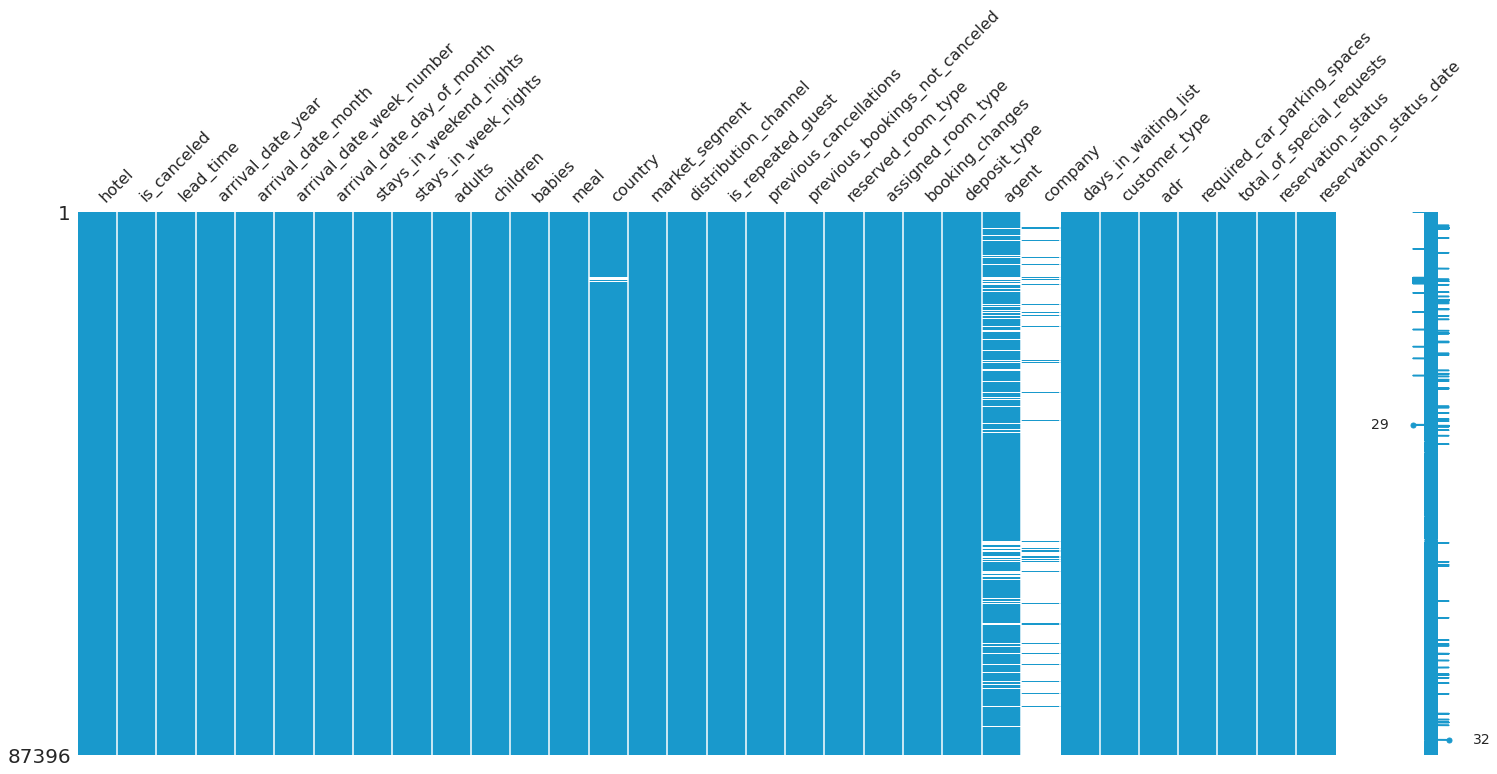

In [42]:
# 결측치를 시각적으로 확인해보기
import missingno as miss

miss.matrix(df=hotel.iloc[:, :], color=(0.1, 0.6, 0.8))   # color의 3개 값은 빛의 삼원색(R, G, B)에 해당하는 값임.(모두 1이면 흰색, 모두 0이면 검정색으로 표시됨.) 
print("<각 열의 결측치 개수 확인>\n\n",hotel.isnull().sum())
# -> 결측치의 대부분은 agent와 company 칼럼에 분포해있으므로 나머지 변수들의 분석을 위해 일단은 결측치가 있는 행, 열을 삭제하지 않도록 하겠음.

In [43]:
# 질문 만들기
# 1) 주말 투숙 일수(stays_in_weekend_nights)와 평일 투숙 일수(stays_in_week_nights)의 평균 일일 요금(adr (=Average Daily Rate))은 다를까?
# 2) 예약을 취소하는 사람들의 특징은 무엇일까?  
# ->  취소 여부(is_canceled)에 따른 예약 정보 비교('hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 
# 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 
# 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 
# 'required_car_parking_spaces', 'total_of_special_requests')
# 3) 더 비싼 룸을 예약한 고객은 요구 사항이 더 많을까?  -> 예약된 객실 유형(reserved_room_type)에 따른 요구사항('required_car_parking_spaces', 'total_of_special_requests') 비교
# 4) 투숙객의 구성원('adults', 'children', 'babies')은 예약 사항('meal', 'reserved_room_type', 'assigned_room_type', 'adr')에 영향을 미칠까? 

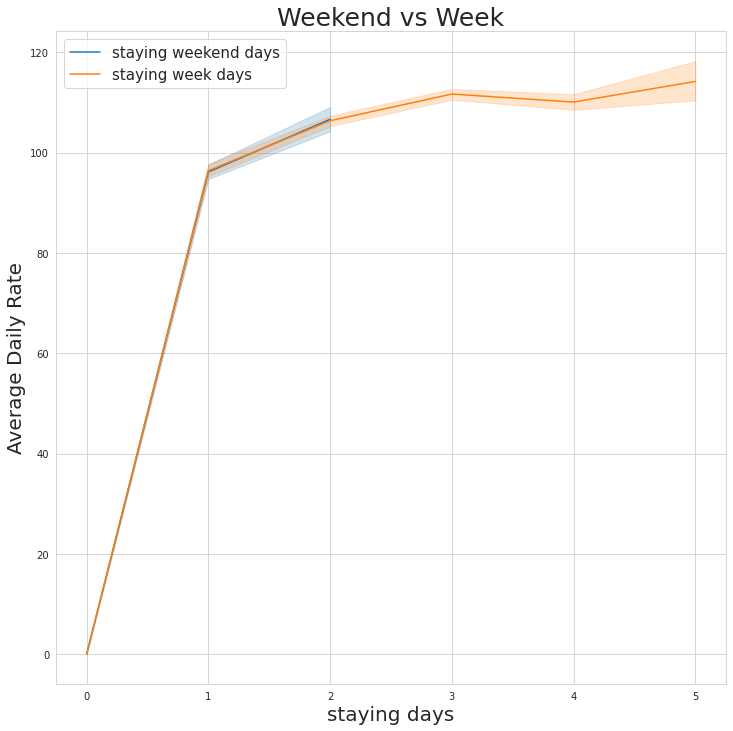

In [44]:
# 질문에 대해 분석해보기

# 1) 주말 투숙 일수(stays_in_weekend_nights)와 평일 투숙 일수(stays_in_week_nights)의 평균 일일 요금(adr (=Average Daily Rate))은 다를까?

## 평일과 주말에 걸쳐 투숙한(연속적으로 투숙한) 고객을 제외한 데이터 추출(순수하게 평일 결제 금액과 주말 결제 금액을 비교하기 위해서)
only_weekend = hotel[hotel["stays_in_week_nights"] == 0][["stays_in_weekend_nights", "adr"]]
only_week = hotel[hotel["stays_in_weekend_nights"] == 0][["stays_in_week_nights", "adr"]]

## 회귀 분석 그래프로 비교해보기(음영은 회귀 분석 그래프의 오차 범위를 나타냄.)
sns.set_style('whitegrid')
f, ax = plt.subplots(1, 1, figsize = (12, 12))
g1 = sns.lineplot(data = only_weekend, x = "stays_in_weekend_nights", y = "adr", label = "staying weekend days")
g2 = sns.lineplot(data = only_week, x = "stays_in_week_nights", y = "adr", label = "staying week days")
plt.title("Weekend vs Week", fontsize=25)
plt.xlabel('staying days', fontsize=20)
plt.ylabel('Average Daily Rate', fontsize=20)
plt.legend(fontsize=15)

plt.show()

In [45]:
### 결과 -> 평일과 주말은 숙박 일수에 따라 일일 결제 금액이 유사하게 높아지는 모습을 보였음. 평일과 주말 모두 예약한 숙박일수가 많을수록 일일 결제 금액이 높은 경향을 보였음. 
### 이는 많은 숙박일을 예약한 고객은 그만큼 재정적인 여유가 있어서 더 많은 소비를 하는 것으로 추정됨. 따라서, 숙박일수가 많은 고객일수록 더 많은 유료 서비스를 제공하면 매출이 더 높아질 것으로 예상됨.  

In [46]:
# 2) 예약을 취소하는 사람들의 특징은 무엇일까?  

## ->  취소 여부(is_canceled)에 따른 예약 정보 비교('hotel', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 
## 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 
## 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 
## 'required_car_parking_spaces', 'total_of_special_requests')

In [47]:
print(hotel['hotel'].unique()) # 명목형 변수의 값 확인
print("\n")
print(hotel['meal'].unique()) # 명목형 변수의 값 확인
print("\n")
print((hotel['country'].unique()), "\n- 국가코드의 개수 : {}개".format(len((hotel['country'].unique())))) # 명목형 변수의 값 확인
print("\n")
print((hotel['distribution_channel'].unique())) # 명목형 변수의 값 확인
print("\n")
print((hotel['deposit_type'].unique())) # 명목형 변수의 값 확인

['Resort Hotel' 'City Hotel']


['BB' 'FB' 'HB' 'SC' 'Undefined']


['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN

In [48]:
## 로지스틱 회귀 분석을 위해 명목형 변수들을 더미 변수로 바꿔주기(순서를 정할 수 있는 명목형 변수들이 대상)
## 로지스틱 회귀분석을 위해 hotel 칼럼의 'Resort Hotel'과 'City Hotel'을 임시 변수(더미 변수) 0, 1로 각각 변환하기
hotel.loc[hotel['hotel']=='Resort Hotel','hotel']=0 
hotel.loc[hotel['hotel']=='City Hotel', 'hotel']=1


## 로지스틱 회귀분석을 위해 meal 칼럼의 'FB(Full Board)'와 'HB(Half Board)', 'BB(Bed and Breakfast)', 'SC(Self Catering)'를 임시 변수(더미 변수) 0, 1, 2, 3로 각각 변환하기
hotel.loc[hotel['meal']=='Undefined','meal']=np.nan # 'Undefined'는 결측값으로 처리(로지스틱 회귀 분석 시에는 제외하기 위해서)
hotel.loc[hotel['meal']=='FB','meal']=0
hotel.loc[hotel['meal']=='HB','meal']=1
hotel.loc[hotel['meal']=='BB','meal']=2
hotel.loc[hotel['meal']=='SC','meal']=3 

## 로지스틱 회귀분석을 위해 country 칼럼의 국가코드들을 임시 변수(더미 변수) 1 ~ 178로 각각 변환하기
## (2020년 IMF의 GDP 순위를 더미변수로 반영. 2020년 IMF 틍계자료에 없는 국가는 2019년 세계은행, 2018년 유엔 자료 순으로 반영. 통계가 없거나 178위 이하 국가는 더미변수를 178로 부여)
gdp_dictionary={'PRT':48, 'GBR':5, 'USA':1, 'ESP':14, 'IRL':28, 'FRA':7, 'ROU':45, 'NOR':32, 'OMN':73, 'ARG':30,
                'POL':22, 'DEU':4, 'BEL':25, 'CHE':18, 'CN':11, 'GRC':50, 'ITA':8, 'NLD':17, 'DNK':37, 'RUS':2,
                'SWE':23, 'AUS':13, 'EST':98, 'CZE':47, 'BRA':12, 'FIN':43, 'MOZ':121, 'BWA':117, 'LUX':68,
                'SVN':83, 'ALB':126, 'IND':6, 'CHN':11, 'MEX':16, 'MAR':58, 'UKR':57, 'SMR':171, 'LVA':95, 'PRI':62, 
                'SRB':82, 'CHL':46, 'AUT':27, 'BLR':78, 'LTU':80, 'TUR':20, 'ZAF':41, 'AGO':72, 'ISR':29, 'CYM':153,
                'ZMB':110, 'CPV':167, 'ZWE':127, 'DZA':56, 'KOR':10, 'CRI':77, 'HUN':54, 'ARE':34, 'TUN':89, 'JAM':124,
                'HRV':79, 'HKG':34, 'IRN':21, 'GEO':115, 'AND':155, 'GIB':178, 'URY':81, 'JEY':178, 'CAF':160, 'CYP':104,
                'COL':44, 'GGY':178, 'KWT':59, 'NGA':26, 'MDV':152, 'VEN':84, 'SVK':60, 'FJI':156, 'KAZ':53, 'PAK' :42,
                'IDN':15, 'LBN':112, 'PHL':31, 'SEN':101, 'SYC':175, 'AZE':88, 'BHR':94, 'NZL':51, 'THA':24, 'DOM':65,
                'MKD':131, 'MYS':39, 'ARM':130, 'JPN':3, 'LKA':64, 'CUB':61, 'CMR':90, 'BIH':111, 'MUS':134, 'COM':174,
                'SUR':162, 'UGA':92, 'BGR':69, 'CIV':74, 'JOR':87, 'SYR':120, 'SGP':38, 'BDI':159, 'SAU':19, 'VNM':36,
                'PLW':178, 'QAT':55, 'EGY':33, 'PER':49, 'MLT':122, 'MWI':143, 'ECU':63, 'MDG':125, 'ISL':108, 'UZB':76,
                'NPL':97, 'BHS':133, 'MAC':99, 'TGO':149, 'TWN':20, 'DJI':158, 'STP':178, 'KNA':177, 'ETH':62, 'IRQ':52,
                'HND':102, 'RWA':138, 'KHM':99, 'MCO':149, 'BGD':40, 'IMN':178, 'TJK':144, 'NIC':132, 'BEN':118, 'VGB':178,
                'TZA':71, 'GAB':119, 'GHA':70, 'TMP':165, 'GLP':178, 'KEN':61, 'LIE':151, 'GNB':172, 'MNE':150, 'UMI':178,
                'MYT':178, 'FRO':178, 'MMR':67, 'PAN':73, 'BFA':116, 'LBY':106, 'MLI':114, 'NAM':139, 'BOL':91, 'PRY':93,
                'BRB':153, 'ABW':163, 'AIA':178, 'SLV':100, 'DMA':178, 'PYF':151, 'GUY':148, 'LCA':168, 'ATA':178, 'GTM':66,
                'ASM':178, 'MRT':147, 'NCL':141, 'KIR':178, 'SDN':96, 'ATF':178, 'SLE':155, 'LAO':113} 

for country in hotel['country'].unique():
  if country != country: 
    continue #호텔 데이터의 country 칼럼에서 결측값이 발견된 경우, 이에 별도의 더미변수를 할당하지 않고 건너뛰기
  hotel.loc[hotel['country']==country,'country']=gdp_dictionary[country] # 국가 코드에 대응하는 gdp 순위를 더미변수로 할당하는 과정


## 로지스틱 회귀분석을 위해 distribution_channel 칼럼의 'Direct(직통)', 'Corporate(기업 중개)', 'TA/TO(여행사 중개)', 'GDS(글로벌 유통 시스템)'를
## 임시 변수(더미 변수) 0, 1, 2, 3로 각각 변환하기
hotel.loc[hotel['distribution_channel']=='Undefined','distribution_channel']=np.nan # 'Undefined'는 결측값으로 처리(로지스틱 회귀 분석 시에는 제외하기 위해서)
hotel.loc[hotel['distribution_channel']=='Direct','distribution_channel']=0 
hotel.loc[hotel['distribution_channel']=='Corporate','distribution_channel']=1
hotel.loc[hotel['distribution_channel']=='TA/TO','distribution_channel']=2
hotel.loc[hotel['distribution_channel']=='GDS','distribution_channel']=3


## 로지스틱 회귀분석을 위해 deposit_type 칼럼의 Non Refund(총 숙박 비용에 해당하는 보증금), Refundable(총 숙박 비용보다 낮은 금액의 보증금), No Deposit(보증금이 없음)을 
## 임시 변수(더미 변수) 0, 1, 2로 각각 변환하기
hotel.loc[hotel['deposit_type']=='Non Refund','deposit_type']=0
hotel.loc[hotel['deposit_type']=='Refundable','deposit_type']=1
hotel.loc[hotel['deposit_type']=='No Deposit','deposit_type']=2

In [49]:
## hotel, meal, country, distribution_channel, deposit_type 칼럼이 더미 변수로 변환된 것을 확인 
## (선형 회귀 분석을 위해 명목형 변수를 이산형 변수로 변환한 것임.)
hotel[['hotel', 'meal', 'country', 'distribution_channel', 'deposit_type']] 

,hotel,meal,country,distribution_channel,deposit_type
0,0,2,48,0,2
1,0,2,48,0,2
2,0,2,5,0,2
3,0,2,5,1,2
4,0,2,5,2,2
...,...,...,...,...,...
119385,1,2,25,2,2
119386,1,2,7,2,2
119387,1,2,4,2,2
119388,1,2,5,2,2


In [50]:
from sklearn.model_selection import train_test_split # 로지스틱 회귀 분석을 위해 기존 데이터를 학습용 데이터와 테스트용 데이터로 분리하는 패키지 불러오기
clean_hotel = hotel.dropna() # 결측치가 있는 행들을 제거
x = clean_hotel[['hotel', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
        'babies', 'meal', 'country', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
        'previous_bookings_not_canceled', 'booking_changes', 'deposit_type', 
        'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']]
y = clean_hotel[['is_canceled']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2) # 기존 데이터를 학습용 데이터(80%)와 테스트용 데이터(20%)로 분리

from sklearn.preprocessing import StandardScaler # 변수들의 단위를 표준화하는 도구 불러오기
scaler = StandardScaler() # 표준화 도구 만들기

x_train = scaler.fit_transform(x_train) # x축에 해당하는 학습용 데이터(독립 변수. (ex.'hotel', 'lead_time' 등)) 표준화
x_test = scaler.fit_transform(x_test) # x축에 해당하는 테스트용 데이터(독립 변수. (ex.'hotel', 'lead_time' 등)) 표준화 

from sklearn import preprocessing # 로지스틱 회귀분석을 위해 y축의 연속적인 값을 범주형 값(0, 1)로 변환하는 도구 불러오기

encoder = preprocessing.LabelEncoder() # 변환 도구 만들기
y_train = encoder.fit_transform(y_train) # 로지스틱 회귀분석을 위해 y축 종속변수('is_canceled')의 연속적인 값을 범주형 값(0, 1)로 변환
y_test = encoder.fit_transform(y_test) # 로지스틱 회귀분석을 위해 y축 종속변수('is_canceled')의 연속적인 값을 범주형 값(0, 1)로 변환

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 분석 도구 불러오기
logistic_model = LogisticRegression() # 로지스틱 회귀 분석 모델 구축하기
logistic_model.fit(x_train, y_train) # 로지스틱 회귀 분석 모델에 학습용 데이터 넣기

## 모델에 테스트용 데이터를 넣고 정확도 확인하기
##설명력(=R^2. 결정계수를 의미)을 확인하는 것임. 설명력은 회귀선이 전체 데이터의 인과관계를 얼마나 잘 설명하는지를 나타냄. 
print("테스트용 데이터셋 예측 정확도 : {:.2f}%\n".format(logistic_model.score(x_test, y_test)*100)) 

테스트용 데이터셋 예측 정확도 : 81.58%



In [52]:
## 회귀 계수 확인하기
## 회계계수의 절댓값이 클수록 is_canceled(취소여부)에 많은 영향을 미친다는 의미이며, 양수는 is_canceled와 정비례, 음수는 반비례 관계를 가진다는 것을 나타냄.
model_coefficient = pd.Series(logistic_model.coef_[0], x.columns).sort_values(ascending=False)
model_coefficient

country                           1.723530
booking_changes                   0.383860
lead_time                         0.355448
deposit_type                      0.226610
babies                            0.000000
days_in_waiting_list              0.000000
previous_cancellations            0.000000
is_repeated_guest                -0.014024
previous_bookings_not_canceled   -0.040163
hotel                            -0.066980
adults                           -0.105310
stays_in_week_nights             -0.139638
children                         -0.231835
required_car_parking_spaces      -0.306323
distribution_channel             -0.310371
total_of_special_requests        -0.642191
meal                             -0.670328
stays_in_weekend_nights          -0.691205
dtype: float64

In [53]:
### 결과 -> 더 낮은 GDP(국내 총생산)를 갖는 'country'(국적)의 고객은 'is_canceled'(취소 여부)가 높아진다는 것을 발견함. 
### GDP가 낮은 국적의 고객일수록 평균 재산이 적어 좀 더 신중하게 여행을 계획하기 때문에 호텔 취소 확률이 높은 것으로 추정됨.
### 'total_of_special_requests(모든 특별 요구사항의 수)'의 값이 클수록 is_canceled(취소여부)는 낮아진다는 점을 찾아냄.
### 특별 요구사항이 높을수록 호텔에 대한 기대치가 크기 때문에 호텔의 취소 가능성도 낮아지는 것으로 생각됨.

In [54]:
### (참고용) 데이터들을 넣었을때 각 고객의 취소여부에 대한 로지스틱 모델의 예측 결과(0은 '취소 안함', 1은 '취소함'을 의미)
#### 원래는 모델에 x_test(테스트용 데이터)를 넣어야 하나, 이 데이터에 취소한 고객이 없어 x_train(학습용 데이터)를 넣고 예측 결과를 나타내보았음

y_predict = logistic_model.predict(x_train) 
print("고객의 수 : {}명".format(len(x_train)), "\n\n예측결과 : \n", y_predict)

i=0
customer_number=[]
for result in y_predict:
  if result==1:
    customer_number.append(i)
  i+=1
print("\n취소한 고객의 수 : {}명".format(len(customer_number)))
initialized_x_train = scaler.inverse_transform(x_train) # 변수들의 단위를 표준화했던 데이터를 원래 값으로 되돌리기
for i in customer_number:
  print("\n취소한 고객 정보\n\n ", initialized_x_train[i])

고객의 수 : 151명 

예측결과 : 
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]

취소한 고객의 수 : 1명

취소한 고객 정보

  [-1.68134128e-02  8.91251398e+01  7.37071398e-01  3.14501860e+00
  1.74848585e+00  3.42030884e+00  0.00000000e+00  6.58980375e-03
  4.96624796e+01  2.09866950e+00 -1.59037947e-02  5.26315789e-02
  1.99812742e-02  1.04073887e+00  1.99514681e+00  0.00000000e+00
  2.35196574e-02  1.00389442e-01]


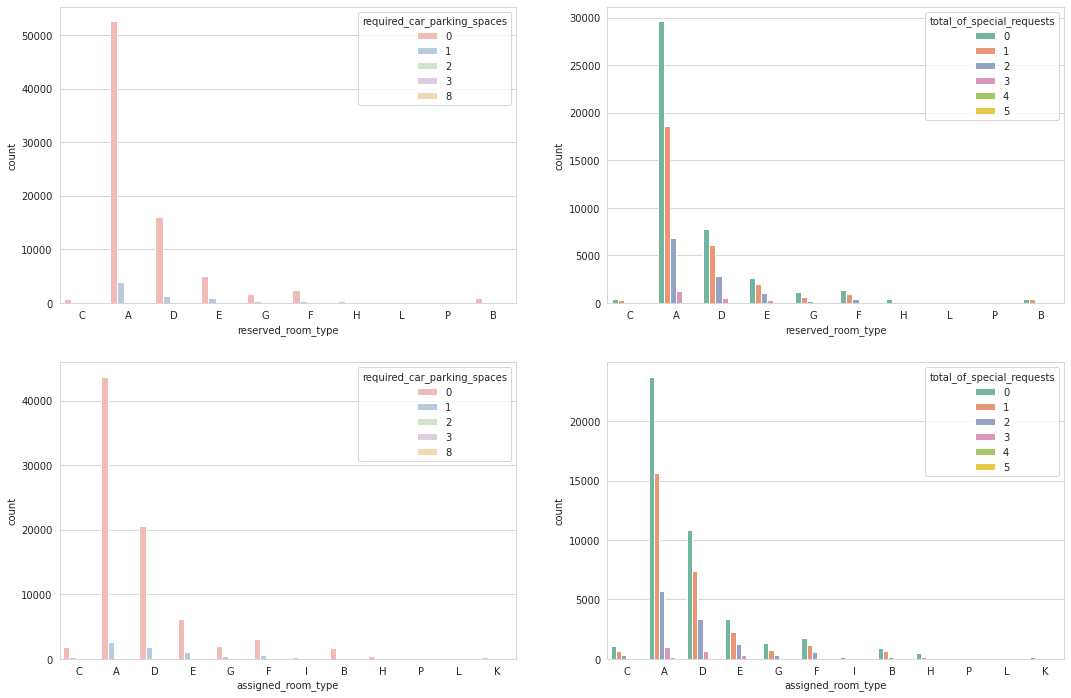

In [55]:
# 3) 더 비싼 룸을 예약한 고객은 요구 사항이 더 많을까?  -> 예약된 객실 유형(reserved_room_type)에 따른 요구사항('required_car_parking_spaces', 'total_of_special_requests') 비교


## 예약된 객실 유형(reserved_room_type)에 따른 요구사항('required_car_parking_spaces', 'total_of_special_requests')의 수를 시각화해보기

f, ax = plt.subplots(2, 2, figsize=(18, 12)) # 가로 : 18, 세로 : 12 길이의 그래프 원판 준비 
parking_per_room = sns.countplot(x="reserved_room_type", data=hotel, hue='required_car_parking_spaces', palette="Pastel1", ax=ax[0, 0])
requests_per_room = sns.countplot(x="reserved_room_type", data=hotel, hue='total_of_special_requests',  palette="Set2", ax=ax[0, 1])
parking_per_assigned_room = sns.countplot(x="assigned_room_type", data=hotel, hue='required_car_parking_spaces', palette="Pastel1", ax=ax[1, 0])
requests_per_assigned_room = sns.countplot(x="assigned_room_type", data=hotel, hue='total_of_special_requests', palette="Set2", ax=ax[1, 1])

for i in range(2):
  for j in range(2):
    sns.move_legend(ax[i, j], "upper right") # 위 그래프에서 hue 변수에 의해 생성된 범례들을 오른쪽 위로 옮기기
plt.show() # 그래프 구현하기

In [56]:
hotel['required_car_parking_spaces'].unique()

array([0, 1, 2, 8, 3])

In [57]:
### 결과 -> 요구사항은 예약한 룸의 유형에 관계없이 0회가 가장 많았고, 1회 이상은 그 1/2이상의 수치로 떨어짐.
### 따라서, 예약한 룸의 유형에 따라 요구사항의 비율이 크게 달라지지 않는다는 것을 알 수 있었음. 

In [58]:
# 4) 투숙객의 구성원('adults', 'children', 'babies')은 예약 사항('meal', 'reserved_room_type', 'assigned_room_type', 'adr')에 영향을 미칠까? 

## 다중 선형 회귀분석을 위해 meal 칼럼의 'FB(Full Board)'와 'HB(Half Board)', 'BB(Bed and Breakfast)', 'SC(Self Catering)'를 임시 변수(더미 변수) 0, 1, 2, 3로 각각 변환하기
## 2번 질문의 로지스틱 회귀분석 과정에서 이미 변환했으니 여기서는 생략하겠음.
## hotel.loc[hotel['meal']=='Undefined','meal']=np.nan # 'Undefined'는 결측값으로 처리(다중 선형 회귀 분석 시에는 제외하기 위해서)
## hotel.loc[hotel['meal']=='FB','meal']=0
## hotel.loc[hotel['meal']=='HB','meal']=1
## hotel.loc[hotel['meal']=='BB','meal']=2
## hotel.loc[hotel['meal']=='SC','meal']=3 

## 다중 선형 회귀 분석을 위해 reserved_room_type 칼럼의 객실 유형 ID들을 임시 변수(더미 변수) 1~10으로 변환 
## 임시 변수(더미 변수) 0, 1, 2로 각각 변환하기'C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B']

hotel.loc[hotel['reserved_room_type']=='C','reserved_room_type']=1
hotel.loc[hotel['reserved_room_type']=='A','reserved_room_type']=2
hotel.loc[hotel['reserved_room_type']=='D','reserved_room_type']=3
hotel.loc[hotel['reserved_room_type']=='E','reserved_room_type']=4
hotel.loc[hotel['reserved_room_type']=='G','reserved_room_type']=5
hotel.loc[hotel['reserved_room_type']=='F','reserved_room_type']=6
hotel.loc[hotel['reserved_room_type']=='H','reserved_room_type']=7
hotel.loc[hotel['reserved_room_type']=='L','reserved_room_type']=8
hotel.loc[hotel['reserved_room_type']=='P','reserved_room_type']=9
hotel.loc[hotel['reserved_room_type']=='B','reserved_room_type']=10

## 다중 선형 회귀 분석을 위해 assigned_room_type 칼럼의 객실 유형 ID들을 임시 변수(더미 변수) 1~12으로 변환 
## 임시 변수(더미 변수) 0, 1, 2로 각각 변환하기'C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B', 'I', 'K']

hotel.loc[hotel['assigned_room_type']=='C','assigned_room_type']=1
hotel.loc[hotel['assigned_room_type']=='A','assigned_room_type']=2
hotel.loc[hotel['assigned_room_type']=='D','assigned_room_type']=3
hotel.loc[hotel['assigned_room_type']=='E','assigned_room_type']=4
hotel.loc[hotel['assigned_room_type']=='G','assigned_room_type']=5
hotel.loc[hotel['assigned_room_type']=='F','assigned_room_type']=6
hotel.loc[hotel['assigned_room_type']=='H','assigned_room_type']=7
hotel.loc[hotel['assigned_room_type']=='L','assigned_room_type']=8
hotel.loc[hotel['assigned_room_type']=='P','assigned_room_type']=9
hotel.loc[hotel['assigned_room_type']=='B','assigned_room_type']=10
hotel.loc[hotel['assigned_room_type']=='I','assigned_room_type']=11
hotel.loc[hotel['assigned_room_type']=='K','assigned_room_type']=12

In [59]:
from sklearn.model_selection import train_test_split # 로지스틱 회귀 분석을 위해 기존 데이터를 학습용 데이터와 테스트용 데이터로 분리하는 패키지 불러오기
clean_hotel = hotel.dropna() # 결측치가 있는 행들을 제거
x = clean_hotel[['adults', 'children', 'babies']]
y = clean_hotel[['meal', 'reserved_room_type', 'assigned_room_type', 'adr']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2) # 기존 데이터를 학습용 데이터(80%)와 테스트용 데이터(20%)로 분리

from sklearn.linear_model import LinearRegression # 다중 선형 회귀 분석 도구 불러오기
meal_model = LinearRegression() # 'meal'에 대한 다중 선형 회귀 분석 모델 구축하기
reserved_model = LinearRegression() # 'reserved_room_type'에 대한 다중 선형 회귀 분석 모델 구축하기
assigned_model = LinearRegression() # 'assigned_room_type'에 대한 다중 선형 회귀 분석 모델 구축하기
adr_model = LinearRegression() # 'adr(Average Daily Revenue)'에 대한 다중 선형 회귀 분석 모델 구축하기

meal_model.fit(x_train, y_train['meal']) # 'meal'의 다중 선형 회귀 분석 모델에 학습용 데이터 넣기
reserved_model.fit(x_train, y_train['reserved_room_type']) # 'reserved_room_type'의 다중 선형 회귀 분석 모델에 학습용 데이터 넣기
assigned_model.fit(x_train, y_train['assigned_room_type']) # 'assignation'의 다중 선형 회귀 분석 모델에 학습용 데이터 넣기
adr_model.fit(x_train, y_train['adr']) # 'meal' 다중 선형 회귀 분석 모델에 학습용 데이터 넣기

## 모델에 테스트용 데이터를 넣고 정확도 확인하기
##설명력(=R^2. 결정계수를 의미)을 확인하는 것임. 설명력은 회귀선이 전체 데이터의 인과관계를 얼마나 잘 설명하는지를 나타냄.
print("테스트용 데이터셋(meal) 예측 정확도 : {:.2f}%\n".format(meal_model.score(x_test, y_test['meal'])*100)) # 모델에 테스트용 데이터를 넣고 정확도 확인
print("테스트용 데이터셋(reserved_room_type) 예측 정확도 : {:.2f}%\n".format(reserved_model.score(x_test, y_test['reserved_room_type'])*100))
print("테스트용 데이터셋(assigned_room_type) 예측 정확도 : {:.2f}%\n".format(assigned_model.score(x_test, y_test['assigned_room_type'])*100))
print("테스트용 데이터셋(adr) 예측 정확도 : {:.2f}%\n".format(adr_model.score(x_test, y_test['adr'])*100))

테스트용 데이터셋(meal) 예측 정확도 : -6.60%

테스트용 데이터셋(reserved_room_type) 예측 정확도 : -21.38%

테스트용 데이터셋(assigned_room_type) 예측 정확도 : -1.42%

테스트용 데이터셋(adr) 예측 정확도 : -25.30%



In [60]:
### 결과 -> 'meal', 'reserved_room_type', 'assigned_room_type', 'adr'에 대한 예측은 설명력(R^2)이 낮기 때문에 예측 결과를 신뢰할 수 없음.
### 따라서, 주어진 데이터로 투숙객의 구성원('adults', 'children', 'babies')이 예약 사항('meal', 'reserved_room_type', 'assigned_room_type', 'adr')에 
### 영향을 미칠지는 알 수 없음.